# Part 1: Rejection Sampling

First import dependencies

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

## Create Samples
In the functions below we create random samples of size n, for the given distributions:
$U \sim U(0, 1)$,
$X \sim N(0, 1)$,
$Y \sim \exp(1)$, and
$Z \sim \|X\|$

In [3]:
def simulate_u(size: int) -> np.ndarray:
    return np.random.random(size)
    
def simulate_x(size: int) -> np.ndarray:
    return np.random.normal(0, 1, size)

def simulate_y(size: int) -> np.ndarray:
    # Moet met dat ding inverse ~ Robin Vraag?
    return np.random.exponential(1, size)

def simulate_z(size: int) -> np.ndarray:
    return np.abs(simulate_x(size))


## Generate Z using rejection sampling
To sample using rejection we need to simulate Y from a proposal distribution. Then simulate $U[0,1]$.
To find a function for when we need to reject, we need to find if $U \leq \frac{f_Z(Y)}{M g_Y(Y)}$

Where $M = \max_y \frac{f_Z(y)}{g_Y(y)}$.

We can derive M as follows. First we need to find:
$$\frac{f_Z(y)}{g_Y(y)}$$
Which equals:
$$\frac{2}{\sqrt{2\pi}} \exp (y(-\frac{y}{2} + 1))$$

We can find the maximum, by equating the derivative to 0.
$$\frac{\partial (\frac{2}{\sqrt{2\pi}} \exp (y(-\frac{y}{2} + 1)))}{\partial y} = (-y + 1) \frac{2}{\sqrt{2\pi}} \exp (-\frac{1}{2}y^2 + y)$$
$$ (-y + 1) \frac{2}{\sqrt{2\pi}} \exp (-\frac{1}{2}y^2 + y) = 0 \Rightarrow (-y + 1) = 0 \lor \exp (-\frac{1}{2}y^2 + y) = 0$$
We know that $\exp (-\frac{1}{2}y^2 + y) = 0$, is only when $y = \infty$, so then the maximum is at $y = 1$.

If we fill that in we get that $M = \frac{2}{\sqrt{2\pi}} e^{\frac{1}{2}}$. Thus we get the following $\alpha(x)$:
$$\alpha(x) = e^{-\frac{1}{2}x^2 + x + \frac{1}{2}}$$

Knowing this we generate $Z$ using rejection sampling. Then we create 1 million samples. We randomly (50%-50%) multiply by $-1$, after which we create a histrogram.

Generated 1314865 Y, for 1000000 Zs.


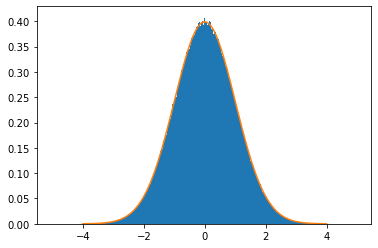

In [4]:
def rejection_abs_normal(n):
    """Generate Z using rejection sampling"""
    Z = np.zeros(n)

    y_generated = 0

    for i in range(0,n):
        Y = simulate_y(1)
        y_generated += 1
        U = np.random.rand()
        while U > np.exp(-0.5 * Y **2 + Y - 0.5):
            Y = simulate_y(1)
            y_generated += 1
            U = np.random.rand()
            
        Z[i] = Y

    print(f"Generated {y_generated} Y, for {n} Zs.")
    return Z

def split(input):
    """Random ly multiply by -1"""
    for i in range(len(input)): 
        if simulate_u(1) > 0.5: input[i] = -input[i]

    return input

def standard_normal(n):
    """To draw standard normal"""
    x = np.linspace(-4, 4, n)
    y = sts.norm.pdf(x)

    return y
    

def main():
    """Draw histogram"""
    n = 1000000
    samples = rejection_abs_normal(n)
    samples = split(samples)


    plt.hist(samples, density=True, bins=500)
    plt.plot(np.linspace(-4, 4, 1000), standard_normal(1000))
    plt.show()



main()

We get from the code above that for 1 million Z's, we needed to generate about 1.315 million Y's. The fraction of this is actually quite similar to the value of $M = 1.315489...$. Misschien moet hier nog meer.